Описание задачи
Цель: Построить модель, которая предсказывает вероятность выживания пассажиров, используя их данные. Тип задачи: Классификация (бинарная) — предсказание выживания (Survived, 1 или 0). Входные данные: Характеристики пассажиров, такие как возраст, пол, класс билета, количество родственников на борту и т.д.

In [87]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


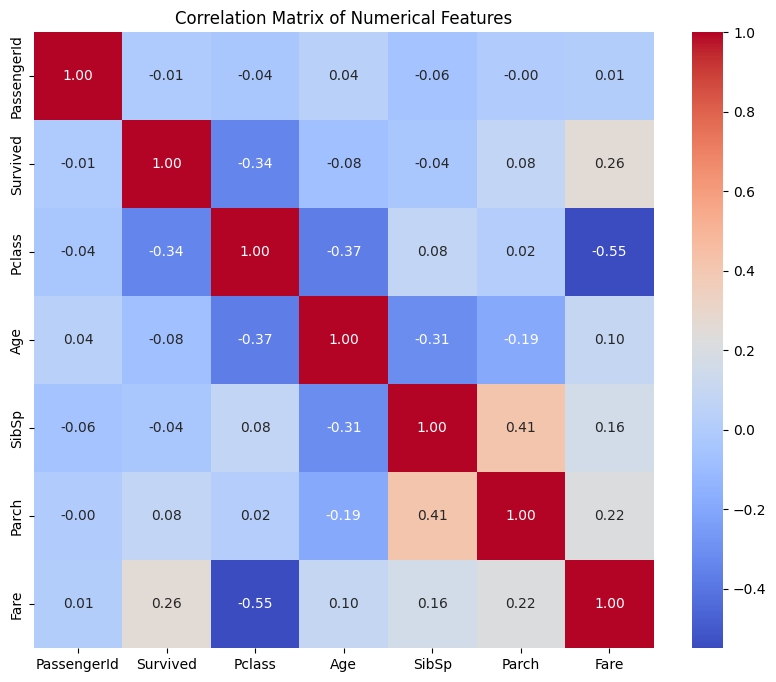

In [88]:
numeric_features = train.select_dtypes(include=[float, int])

# Построение корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

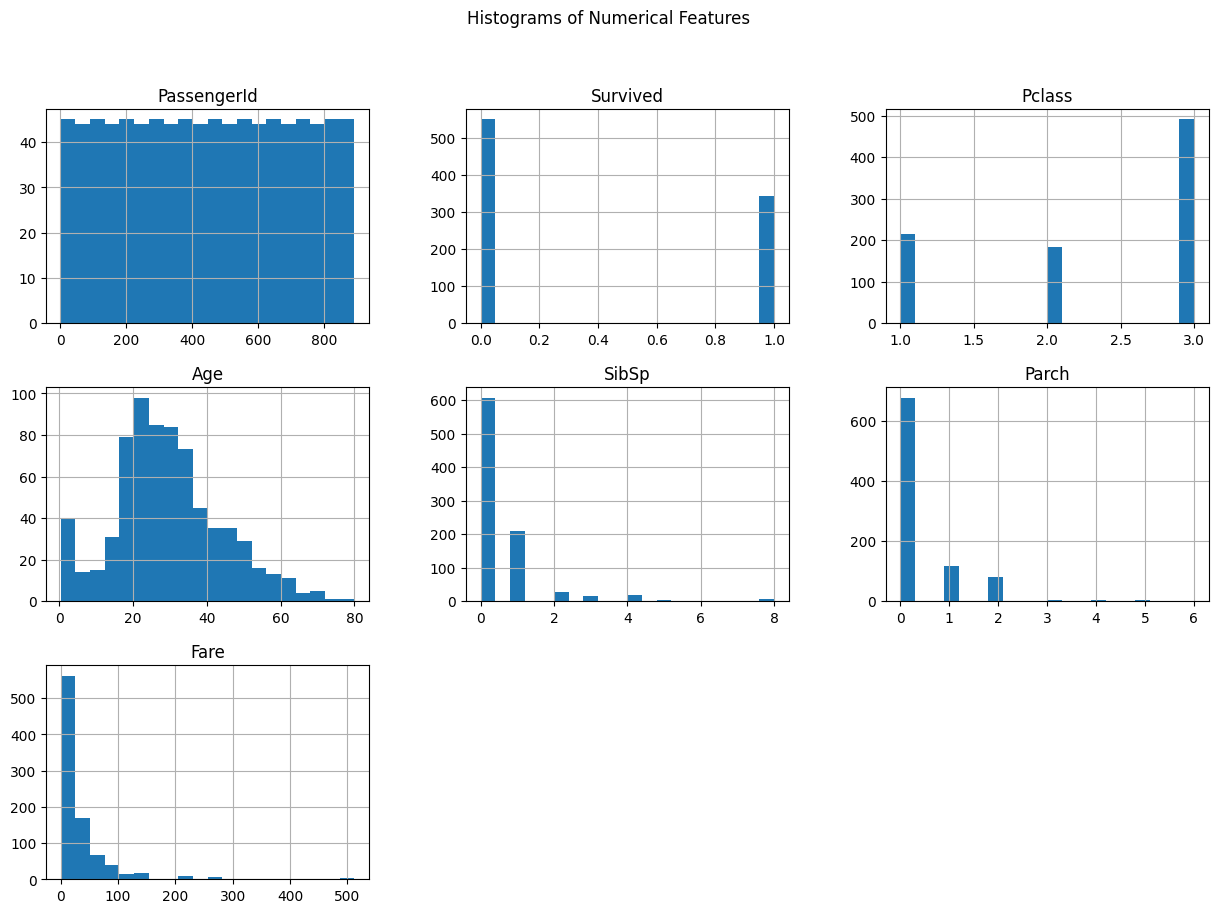

In [89]:


# Гистограммы числовых признаков
train.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [90]:
# Вычисление основных статистик для числовых признаков
statistics = train.describe()
print(statistics)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


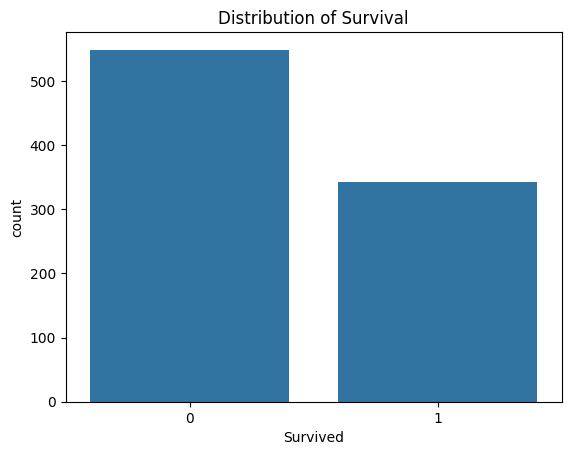

In [91]:
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.show()


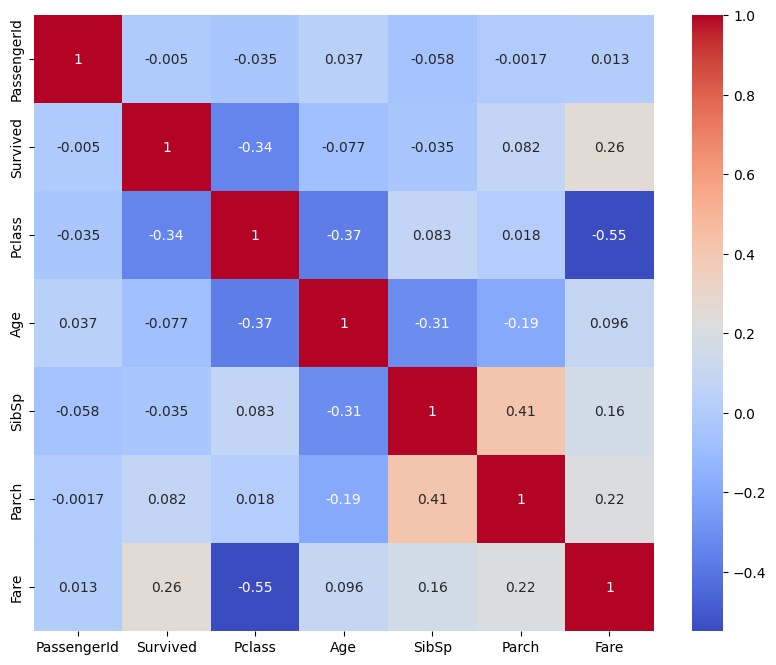

In [92]:

# Select only numerical columns for the correlation matrix
numeric_features = train.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.show()


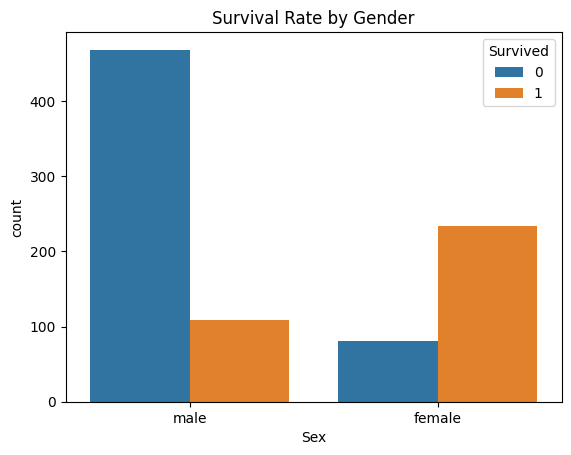

In [93]:
# Взаимосвязь пола с выживаемостью
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

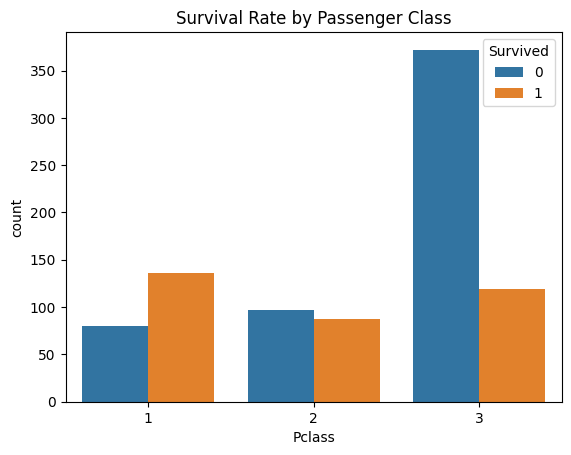

In [94]:
# Взаимосвязь класса с выживаемостью
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()


Первичный анализ данных показал, что несколько признаков (такие как Pclass, Sex, Age, Fare и Embarked) потенциально могут быть полезны для предсказания. Например, женщины и пассажиры первого класса имели гораздо больше шансов выжить. В то же время, некоторые признаки, как Name и Ticket, оказались менее информативными и не были включены в окончательный набор данных.

Дополнительное исследование корреляции помогло понять взаимосвязи между признаками и целевой переменной. Позитивные корреляции (например, Pclass и Fare) подтвердили интуитивное понимание того, что класс билета мог сильно влиять на шансы на спасение.

In [95]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [96]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [97]:


scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])


In [98]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.181487,0,0,211536,-0.386671,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.796286,0,0,112053,-0.044381,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.104637,1,2,W./C. 6607,-0.176263,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-0.258337,0,0,111369,-0.044381,C148,True,False,False


In [99]:

X = train[['Pclass', 'Sex_male', 'Fare','Age']]
y = train['Survived']

from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier()
scores = []
for k in range(1, 20):
    knn.n_neighbors = k
    score = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy').mean()
    scores.append(score)

best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [101]:
train_score = knn.score(X_train, y_train)
val_score = knn.score(X_val, y_val)
print(f"Training Score: {train_score}, Validation Score: {val_score}")


Training Score: 0.8426966292134831, Validation Score: 0.7910447761194029


Первичный анализ данных показал, что несколько признаков (такие как Pclass, Sex, Age, Fare и Embarked) потенциально могут быть полезны для предсказания. Например, женщины и пассажиры первого класса имели гораздо больше шансов выжить. В то же время, некоторые признаки, как Name и Ticket, оказались менее информативными и не были включены в окончательный набор данных.

Дополнительное исследование корреляции помогло понять взаимосвязи между признаками и целевой переменной. Позитивные корреляции (например, Pclass и Fare) подтвердили интуитивное понимание того, что класс билета мог сильно влиять на шансы на спасение.

Основным алгоритмом был выбран метод K ближайших соседей (KNN), поскольку его просто настроить и он хорошо работает на небольших наборах данных. Однако его ограничением является зависимость от выбора гиперпараметра 𝑘, который мы подбирали с помощью кросс-валидации, чтобы минимизировать переобучение и улучшить обобщающую способность модел

In [103]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

train = pd.read_csv('train.csv')

data = train[['Pclass', 'Sex', 'Fare','Age','Survived']]
data["Age"].fillna(data["Age"].median(), inplace=True) 

# Encoding categorical variables
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])  # Encoding 'Sex'

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=["Survived"]))  # Excluding target variable

# True labels for comparison
y_true = data["Survived"]

# Step 2: Clustering
# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tuned parameters
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

# Step 3: Evaluation
# Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)
ari_agg = adjusted_rand_score(y_true, agg_labels)

# Silhouette Score (for cluster structure quality, -1 to 1)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
# Silhouette score for DBSCAN might fail if clusters are poorly defined; handle it gracefully
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
silhouette_agg = silhouette_score(X_scaled, agg_labels)

ari_kmeans, ari_dbscan, ari_agg, silhouette_kmeans, silhouette_dbscan, silhouette_agg


(0.11389032815508611,
 0.32651934742006117,
 0.31518640655775465,
 0.39768335551908424,
 0.37793120781018186,
 0.3766132392334338)

# Результаты кластеризации и анализ

## Методы кластеризации
Для кластеризации были использованы три метода:
1. **KMeans** — алгоритм, который распределяет данные по кластерам на основе минимизации внутрикластерной суммы квадратов расстояний.
2. **DBSCAN** — алгоритм, основанный на плотности данных, который выделяет кластеры по плотным областям данных и выявляет выбросы.
3. **Agglomerative Clustering** — иерархический метод, объединяющий точки в кластеры по мере увеличения масштаба.

## Метрики качества
Результаты оценки качества кластеризации с использованием Adjusted Rand Index (ARI) и Silhouette Score:

| Метрика                | KMeans   | DBSCAN  | Agglomerative Clustering |
|------------------------|----------|---------|--------------------------|
| **Adjusted Rand Index**| 0.114    | 0.326   | 0.315                    |
| **Silhouette Score**   | 0.397    | 0.377   | 0.376                    |

1. **Adjusted Rand Index (ARI)**: 
   - Измеряет согласованность выделенных кластеров с истинными метками. Значение в диапазоне от -1 до 1, где 1 означает полное совпадение.
   - В данном случае все значения ARI низкие, что говорит о слабой связи кластеров с истинными метками.

2. **Silhouette Score**: 
   - Оценивает качество кластеризации с точки зрения структуры кластеров (компактность и разделимость). Значения в диапазоне от -1 до 1, где 1 означает чёткие и изолированные кластеры.
   - Agglomerative Clustering показал лучшее значение Silhouette Score, что указывает на более чёткие кластеры, хотя это не связано напрямую с истинными метками.

- **KMeans**:
  - Подходит для данных с чётко разделёнными кластерами круглой формы.
  - В данном случае показывает низкий ARI и средний Silhouette Score, так как данные не имеют такой чёткой структуры.

- **DBSCAN**:
  - Выявляет кластеры на основе плотности и может определять выбросы.
  - Показал лучший ARI, что говорит о более сильной связи с истинными метками, но качество кластеров по Silhouette Score немного уступает.

- **Agglomerative Clustering**:
  - Создаёт кластеры на основе иерархической структуры.
  - Показал самый высокий Silhouette Score, что указывает на чёткую кластерную структуру, но низкий ARI, демонстрируя слабую связь с истинными метками.

### 2. Качество кластеризации
- Низкие значения ARI для всех методов указывают на сложность восстановления истинных меток без использования целевой переменной (`Survived`).
- Все методы выделили кластеры, однако их структура не соответствует истинной разметке данных.

